In [2]:
#from pyspark.sql import SparkSession
#spark_session = SparkSession.builder.appName('abc').getOrCreate()

In [5]:
b0 = spark_session.read.csv('day.csv', header=True)

In [6]:
b0.limit(10).toPandas()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [8]:
b1 = b0.select(
    b0.season.astype("int"),
    b0.yr.astype("int"),
    b0.mnth.astype("int"),
    b0.holiday.astype("int"),
    b0.weekday.astype("int"),
    b0.workingday.astype("int"),
    b0.weathersit.astype("int"),
    b0.temp.astype("double"),
    b0.atemp.astype("double"),
    b0.hum.astype("double"),
    b0.windspeed.astype("double"),
    b0.cnt.astype("int").alias("label"),
)

In [10]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(). \
    setInputCols(["season","yr","mnth","holiday","weekday","workingday","weathersit","temp",
                 "atemp","hum","windspeed"]). \
    setOutputCol("features")

b2 = assembler.transform(b1)
b2.limit(5).toPandas()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,label,features
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,"[1.0, 0.0, 1.0, 0.0, 6.0, 0.0, 2.0, 0.344167, ..."
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.363478, ..."
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.196364, ..."
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,"[1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.2, 0.212..."
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,"[1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, ..."


In [11]:
b3 = b2.select("features","label")
b3.limit(5).toPandas()

,features,label
0,"[1.0, 0.0, 1.0, 0.0, 6.0, 0.0, 2.0, 0.344167, ...",985
1,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.363478, ...",801
2,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.196364, ...",1349
3,"[1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.2, 0.212...",1562
4,"[1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, ...",1600


In [12]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(b3)

In [13]:
b4 = model.transform(b3)
b4.limit(10).toPandas()

,features,label,prediction
0,"[1.0, 0.0, 1.0, 0.0, 6.0, 0.0, 2.0, 0.344167, ...",985,1898.431797
1,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.363478, ...",801,1374.425553
2,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.196364, ...",1349,1512.844903
3,"[1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 0.2, 0.212...",1562,1739.506787
4,"[1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, ...",1600,2012.868269
5,"[1.0, 0.0, 1.0, 0.0, 4.0, 1.0, 1.0, 0.204348, ...",1606,2216.236808
6,"[1.0, 0.0, 1.0, 0.0, 5.0, 1.0, 2.0, 0.196522, ...",1510,1388.827832
7,"[1.0, 0.0, 1.0, 0.0, 6.0, 0.0, 2.0, 0.165, 0.1...",959,818.437855
8,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.138333, ...",822,656.534661
9,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.150833, ...",1321,1300.376247


In [14]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()

In [15]:
evaluator.evaluate(b4,{evaluator.metricName: "r2"})

0.8002441102343253

In [16]:
evaluator.evaluate(b4,{evaluator.metricName: "rmse"})

865.2260087482985

In [17]:
res = b4.select("prediction","label").toPandas()

In [18]:
res

,prediction,label
0,1898.431797,985
1,1374.425553,801
2,1512.844903,1349
3,1739.506787,1562
4,2012.868269,1600
...,...,...
726,2491.174885,2114
727,3222.005505,3095
728,3039.042944,1341
729,2898.204204,1796


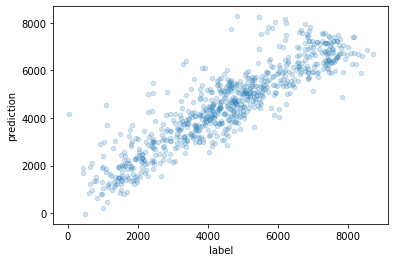

In [19]:
import matplotlib.pyplot as plt
res.plot.scatter(x="label",y="prediction", alpha=0.2)
plt.show()